# Importing librarys

In [1]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

## Download the Data

In [ ]:
jnj_medium_data = yf.download("JNJ", period="2y", interval="1h")

[*********************100%***********************]  1 of 1 completed


In [ ]:
jnj_medium_data.head()

Price,Close,High,Low,Open,Volume
Ticker,JNJ,JNJ,JNJ,JNJ,JNJ
Datetime,,,,,
2023-01-30 14:30:00+00:00,168.350006,168.539993,167.750000,167.929993,1081448
2023-01-30 15:30:00+00:00,164.289993,168.399994,162.218597,168.330002,5740959
2023-01-30 16:30:00+00:00,163.039993,164.490005,162.660004,164.317505,4361098
2023-01-30 17:30:00+00:00,162.519897,163.559998,162.419998,163.039993,2682228
2023-01-30 18:30:00+00:00,162.095001,162.869995,162.070007,162.516693,2129027


In [ ]:
jnj_medium_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,JNJ,JNJ,JNJ,JNJ,JNJ
Datetime,,,,,
2025-01-28 16:30:00+00:00,151.320007,151.559998,151.070007,151.467407,720513
2025-01-28 17:30:00+00:00,151.110001,151.440002,150.949997,151.320007,745488
2025-01-28 18:30:00+00:00,150.990005,151.210007,150.880005,151.110001,910087
2025-01-28 19:30:00+00:00,150.445007,151.000000,150.399994,150.979996,1479855
2025-01-28 20:30:00+00:00,150.389999,151.110001,150.300003,150.440002,1585414


In [ ]:
# rename the columns "Close", "High", "Low", "Open", "Volume"
jnj_medium_data.columns = ["Close", "High", "Low", "Open", "Volume"]

In [ ]:
# download the data
jnj_medium_data.to_csv("jnj_medium_data.csv")

## Loading the data

In [2]:
jnj_medium_data = pd.read_csv("jnj_medium_data.csv")

# Exploratory Analysis

In [3]:
jnj_medium_data.head()

,Datetime,Close,High,Low,Open,Volume
0,2023-01-30 14:30:00+00:00,168.350006,168.539993,167.750000,167.929993,1081448
1,2023-01-30 15:30:00+00:00,164.289993,168.399994,162.218597,168.330002,5740959
2,2023-01-30 16:30:00+00:00,163.039993,164.490005,162.660004,164.317505,4361098
3,2023-01-30 17:30:00+00:00,162.519897,163.559998,162.419998,163.039993,2682228
4,2023-01-30 18:30:00+00:00,162.095001,162.869995,162.070007,162.516693,2129027


In [4]:
jnj_medium_data.shape

(3487, 6)

## Univariate Analysis

In [5]:
jnj_medium_data.describe()

,Close,High,Low,Open,Volume
count,3487.000000,3487.000000,3487.000000,3487.000000,3.487000e+03
mean,156.943181,157.313878,156.566169,156.942215,9.693039e+05
std,6.924648,6.938645,6.900774,6.921027,1.401716e+06
min,141.735001,142.199997,140.679993,141.000000,1.829450e+05
25%,151.787849,152.250000,151.500000,151.815002,4.846575e+05
50%,157.779999,158.139999,157.399994,157.759995,6.703970e+05
75%,161.790001,162.130005,161.387505,161.820007,9.766025e+05
max,175.220001,175.970001,174.669998,175.210098,3.443829e+07


In [6]:
jnj_medium_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  3487 non-null   object 
 1   Close     3487 non-null   float64
 2   High      3487 non-null   float64
 3   Low       3487 non-null   float64
 4   Open      3487 non-null   float64
 5   Volume    3487 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 163.6+ KB


In [7]:
# change Datetim data
jnj_medium_data['Datetime'] = pd.to_datetime(jnj_medium_data['Datetime'])

In [8]:
# check for the missing values
jnj_medium_data.isnull().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [9]:
# skewness and kurtosis
print("Skewness:", jnj_medium_data.select_dtypes(include=np.number).skew())
print("Kurtosis:", jnj_medium_data.select_dtypes(include=np.number).kurtosis())

Skewness: Close    -0.010162
High      0.003773
Low      -0.029489
Open     -0.015771
Volume    9.355365
dtype: float64
Kurtosis: Close      -0.464473
High       -0.446244
Low        -0.487809
Open       -0.469463
Volume    139.967464
dtype: float64


## Distribution Analysis

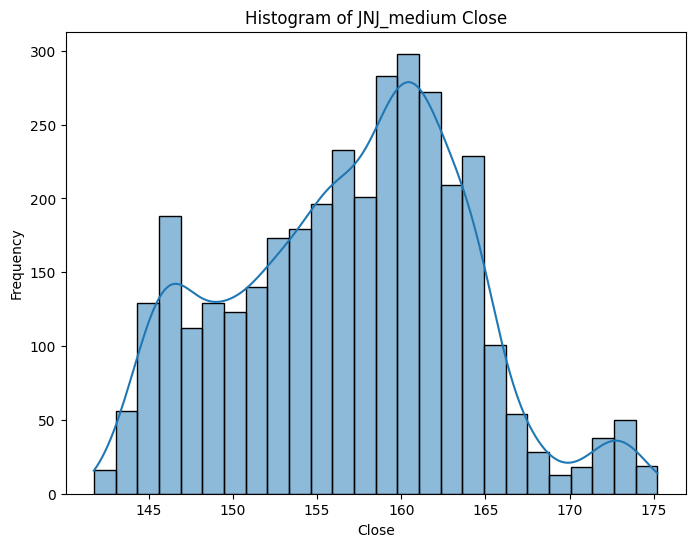

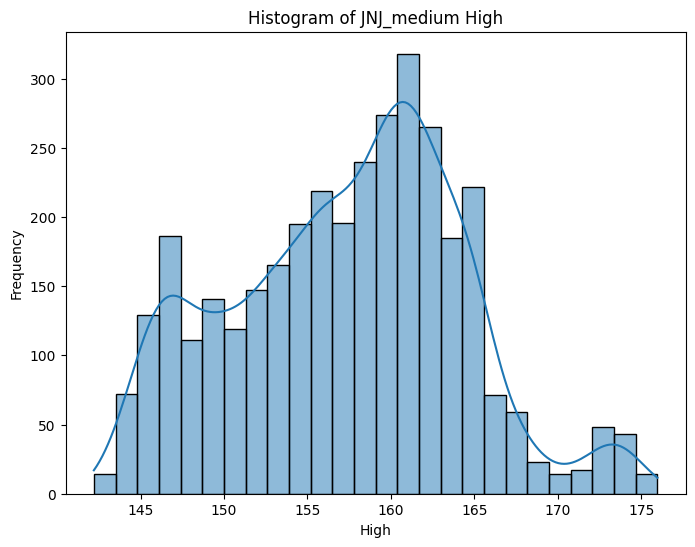

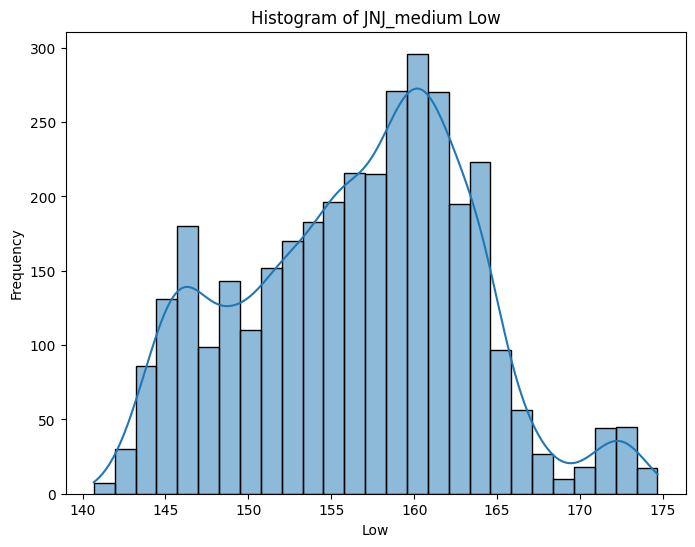

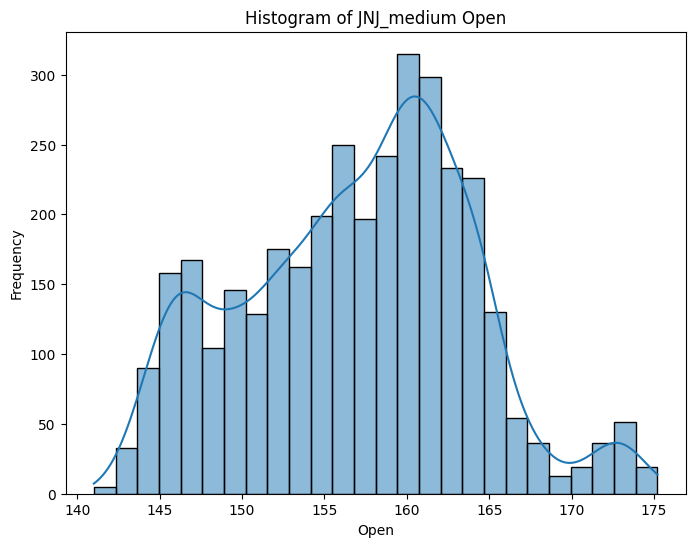

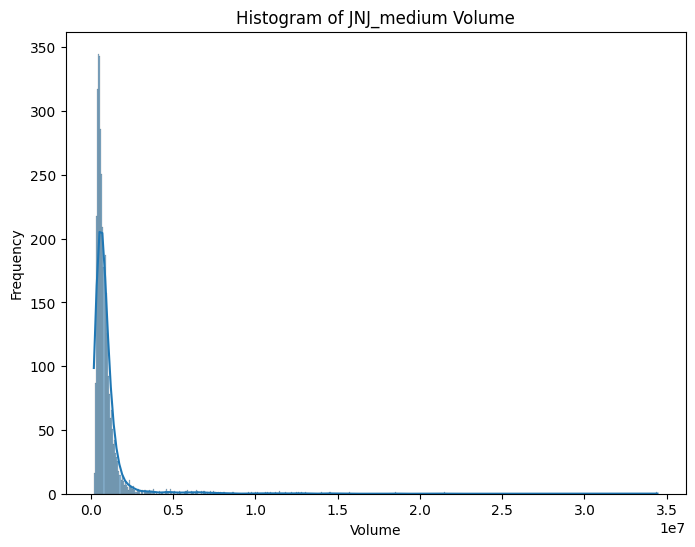

In [11]:
# Identify numerical columns
numerical_columns = jnj_medium_data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(jnj_medium_data[column].unique()) > 10:
        plt.figure(figsize=(8, 6))
        sns.histplot(jnj_medium_data[column], kde=True)
        plt.title(f'Histogram of JNJ_medium {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## Trend Analysis

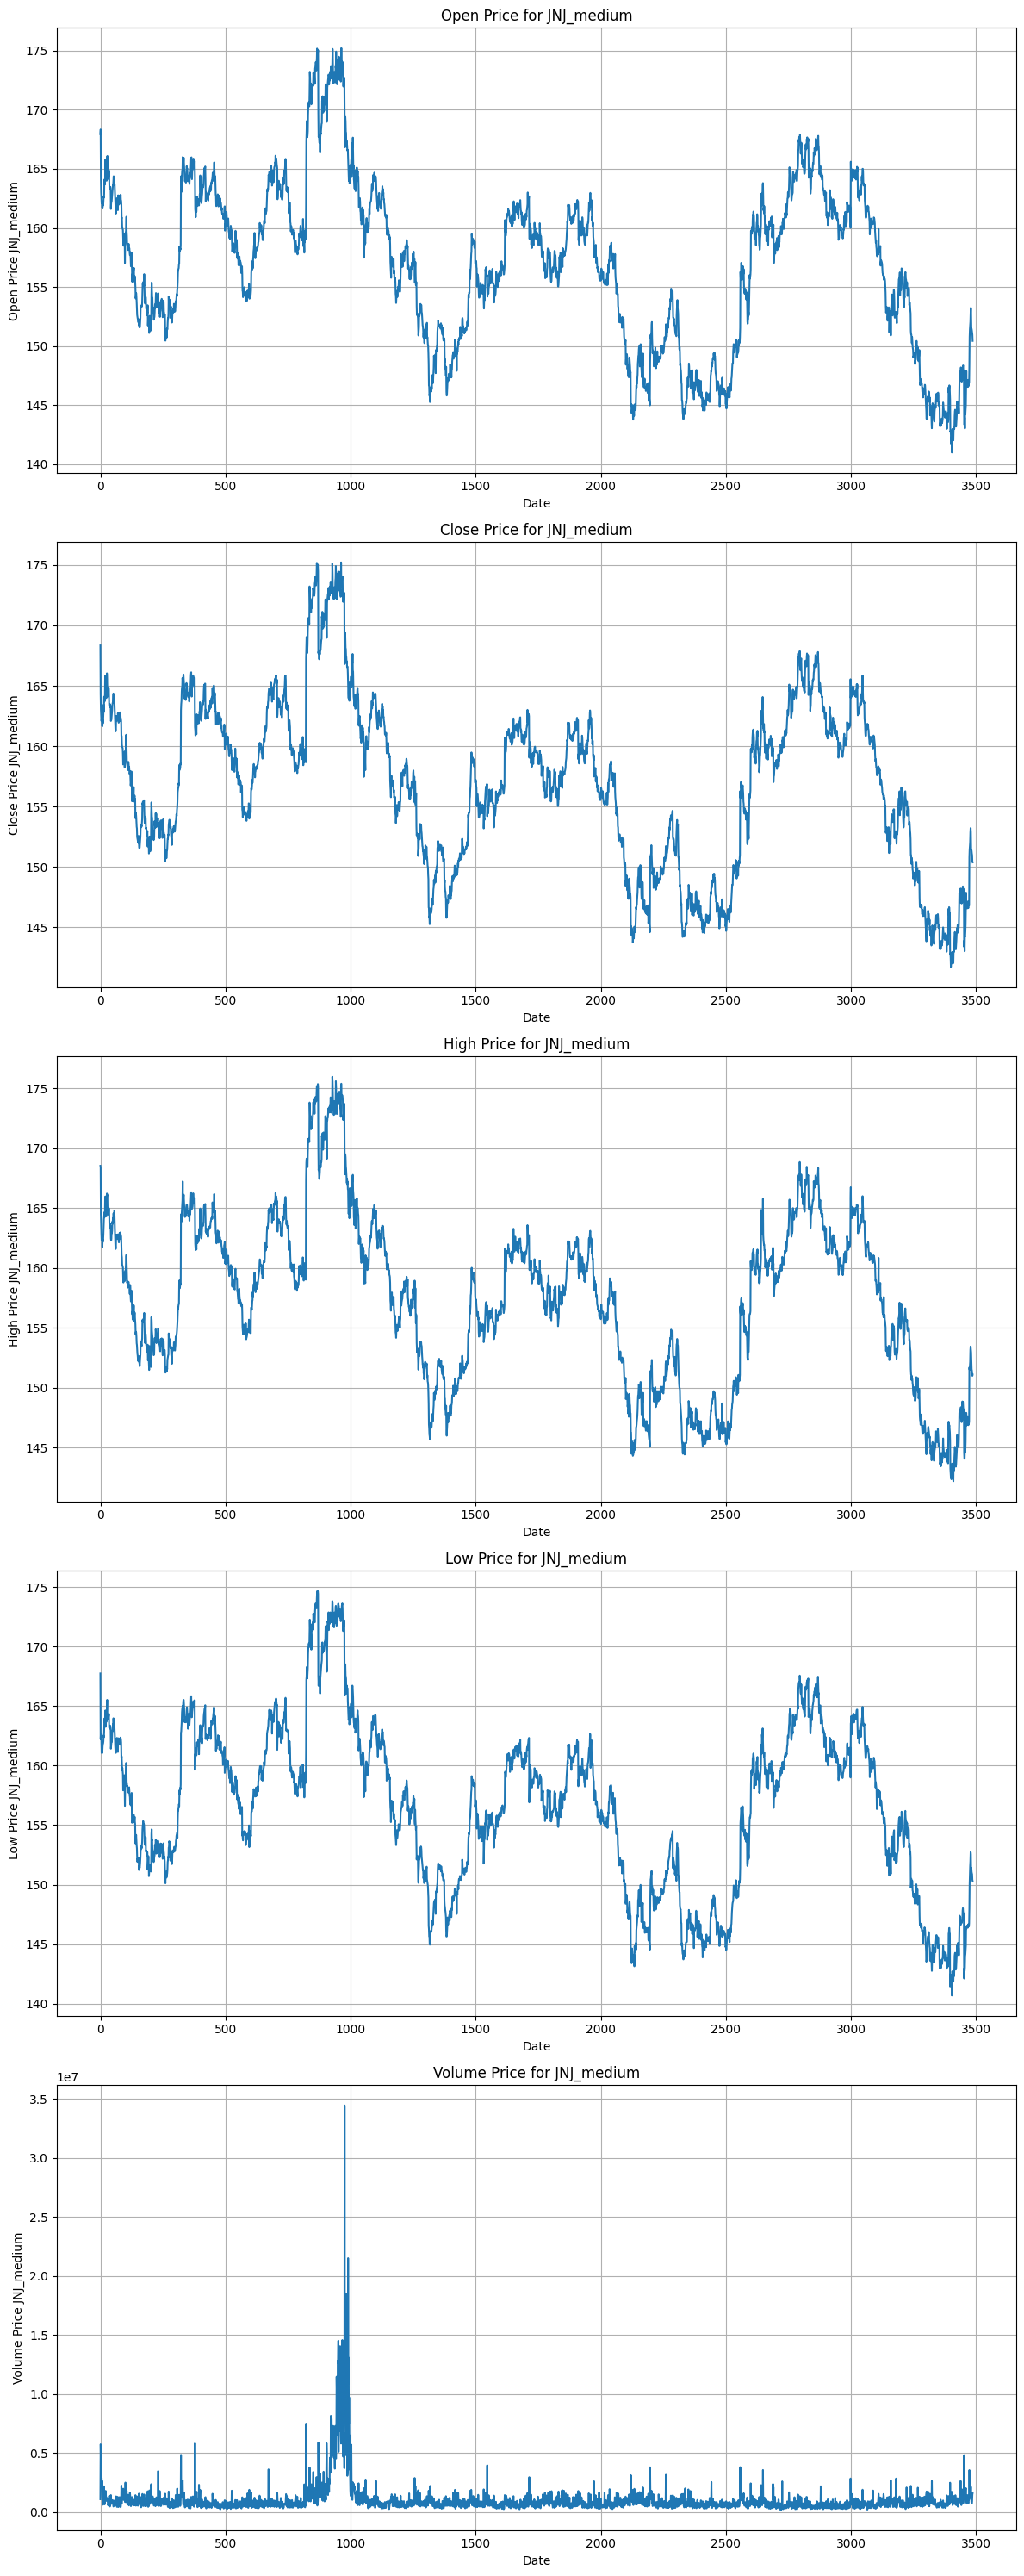

In [12]:
# List of columns to plot
columns = ['Open', 'Close', 'High', 'Low', 'Volume']

# Create subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 6 * len(columns)))

# Loop through each column and plot
for i, col in enumerate(columns):
    axes[i].plot(jnj_medium_data.index, jnj_medium_data[col])
    axes[i].set_title(f'{col} Price for JNJ_medium')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{col} Price JNJ_medium')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

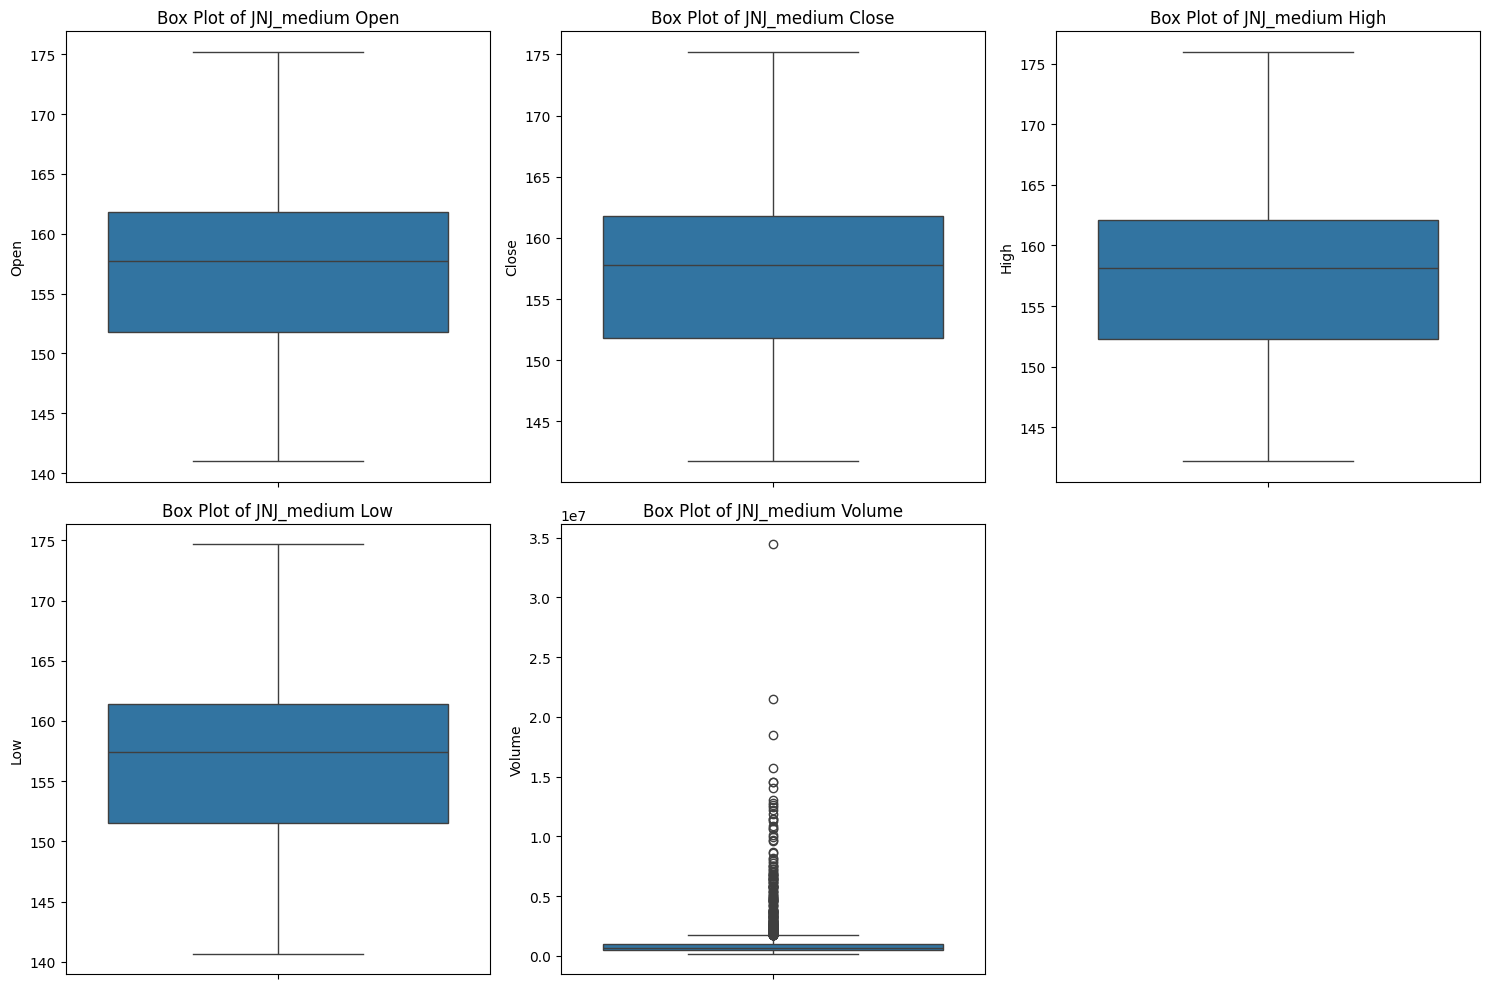

In [13]:
columns = ['Open', 'Close', 'High', 'Low', 'Volume']  # Columns to check

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)  # Create subplots for each column
    sns.boxplot(y=jnj_medium_data[col])
    plt.title(f'Box Plot of JNJ_medium {col}')

plt.tight_layout()
plt.show()

## Bivatiate Analysis

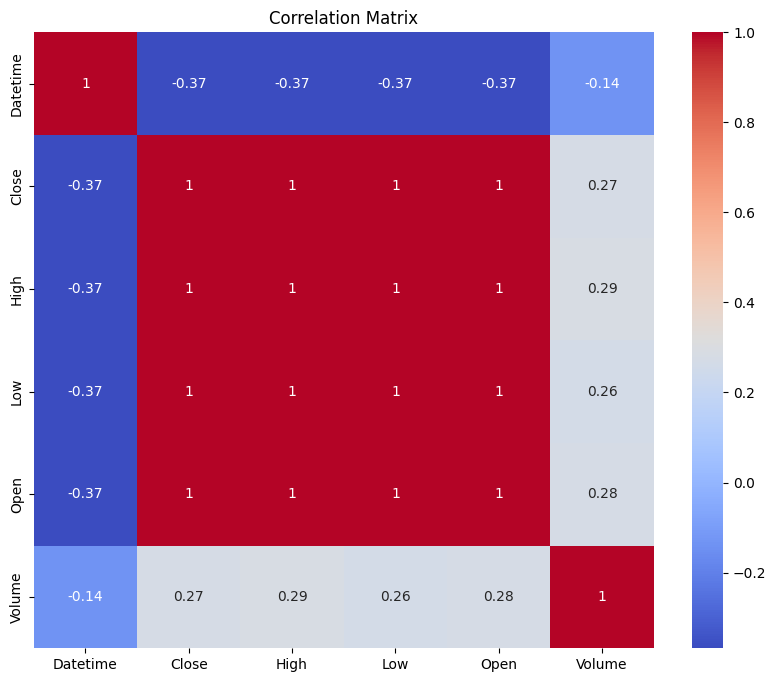

In [14]:
correlation_matrix = jnj_medium_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

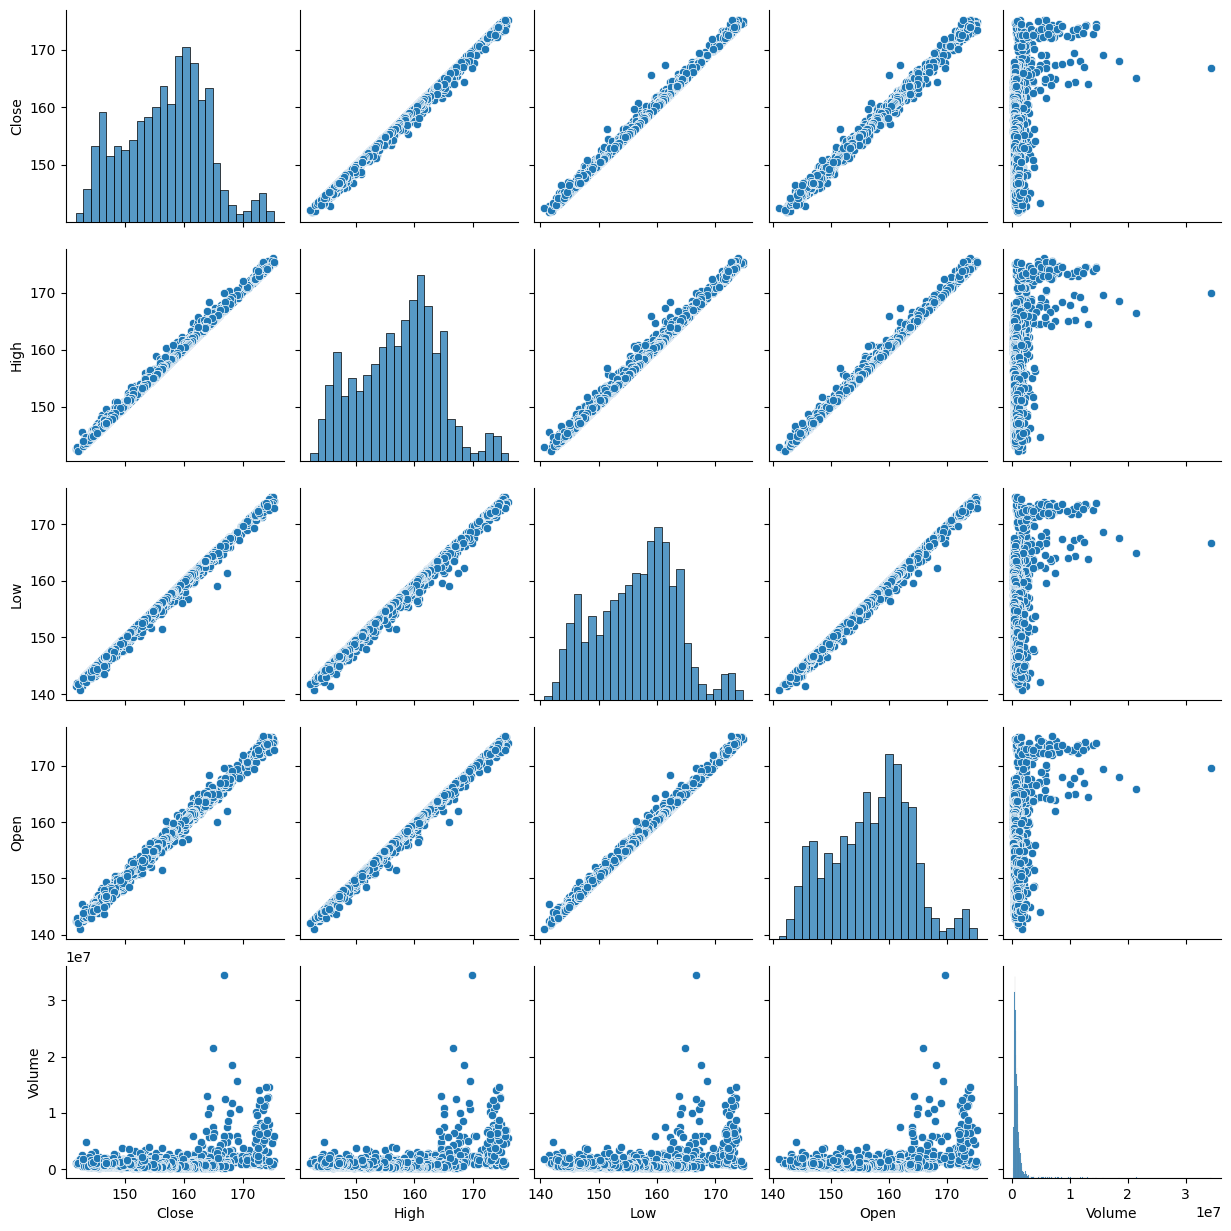

In [15]:
# pairs of numerical columns
sns.pairplot(jnj_medium_data.select_dtypes(include=np.number))
plt.show()

Text(0.5, 1.0, 'JNJ_medium Relationship between Close Price and Trading Volume')

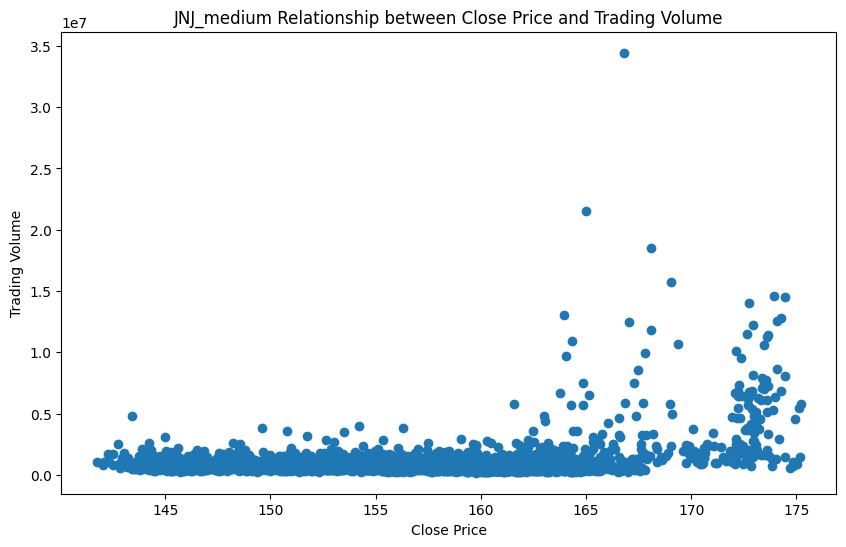

In [16]:
# relationship between price and trading volume
plt.figure(figsize=(10, 6))
plt.scatter(jnj_medium_data['Close'], jnj_medium_data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Trading Volume')
plt.title('JNJ_medium Relationship between Close Price and Trading Volume')

## Feature Engineering

In [17]:
# Moving Average (SMA) with a 365-day window
window_sma = 365
jnj_medium_data['SMA'] = jnj_medium_data['Close'].rolling(window=window_sma).mean()

# Bollinger Bands with a 365-day window
jnj_medium_data['StdDev'] = jnj_medium_data['Close'].rolling(window=window_sma).std()
jnj_medium_data['UpperBand'] = jnj_medium_data['SMA'] + (2 * jnj_medium_data['StdDev'])
jnj_medium_data['LowerBand'] = jnj_medium_data['SMA'] - (2 * jnj_medium_data['StdDev'])

# RSI with a 60-day window
def calculate_rsi(data, window=60):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

jnj_medium_data['RSI'] = calculate_rsi(jnj_medium_data)

In [18]:
jnj_medium_data.head()

,Datetime,Close,High,Low,Open,Volume,SMA,StdDev,UpperBand,LowerBand,RSI
0,2023-01-30 14:30:00+00:00,168.350006,168.539993,167.750000,167.929993,1081448,NaN,NaN,NaN,NaN,NaN
1,2023-01-30 15:30:00+00:00,164.289993,168.399994,162.218597,168.330002,5740959,NaN,NaN,NaN,NaN,NaN
2,2023-01-30 16:30:00+00:00,163.039993,164.490005,162.660004,164.317505,4361098,NaN,NaN,NaN,NaN,NaN
3,2023-01-30 17:30:00+00:00,162.519897,163.559998,162.419998,163.039993,2682228,NaN,NaN,NaN,NaN,NaN
4,2023-01-30 18:30:00+00:00,162.095001,162.869995,162.070007,162.516693,2129027,NaN,NaN,NaN,NaN,NaN


In [19]:
jnj_medium_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,364
StdDev,364
UpperBand,364
LowerBand,364


In [20]:
# fill na with mean
jnj_medium_data.fillna(jnj_medium_data.mean(), inplace=True)

In [21]:
jnj_medium_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


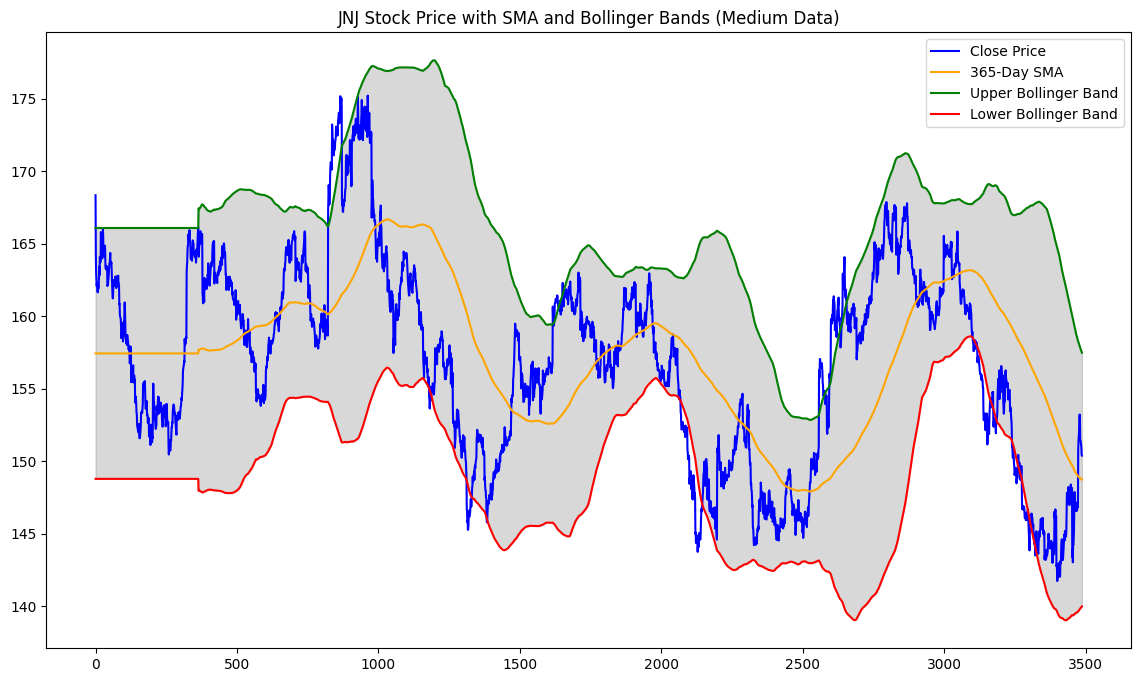

In [22]:
# Plot Close Price, SMA, and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(jnj_medium_data['Close'], label='Close Price', color='blue')
plt.plot(jnj_medium_data['SMA'], label=f'{window_sma}-Day SMA', color='orange')
plt.plot(jnj_medium_data['UpperBand'], label='Upper Bollinger Band', color='green')
plt.plot(jnj_medium_data['LowerBand'], label='Lower Bollinger Band', color='red')
plt.fill_between(jnj_medium_data.index, jnj_medium_data['UpperBand'], jnj_medium_data['LowerBand'], color='gray', alpha=0.3)
plt.title('JNJ Stock Price with SMA and Bollinger Bands (Medium Data)')
plt.legend()
plt.show()

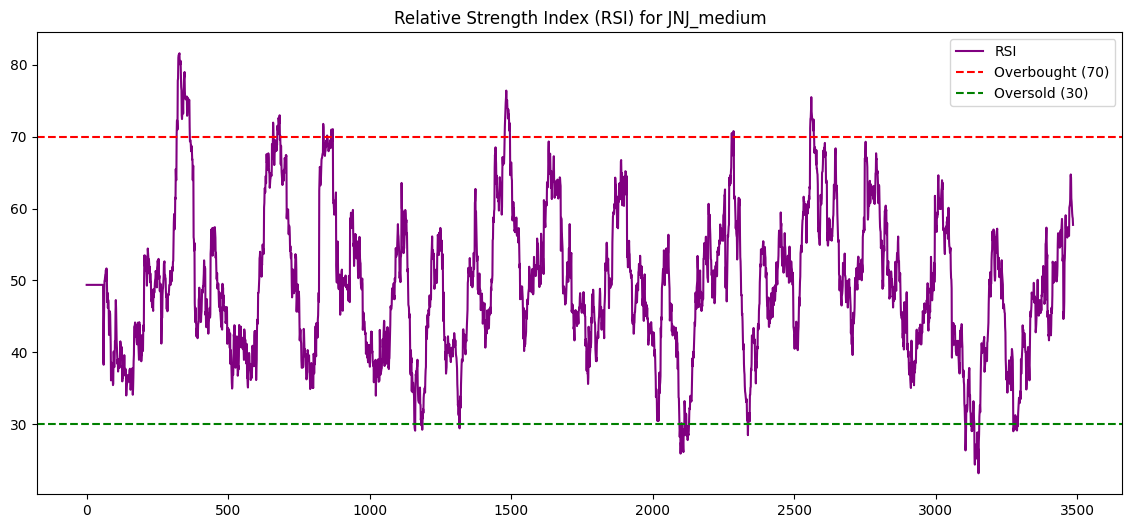

In [23]:
# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(jnj_medium_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for JNJ_medium')
plt.legend()
plt.show()

In [24]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


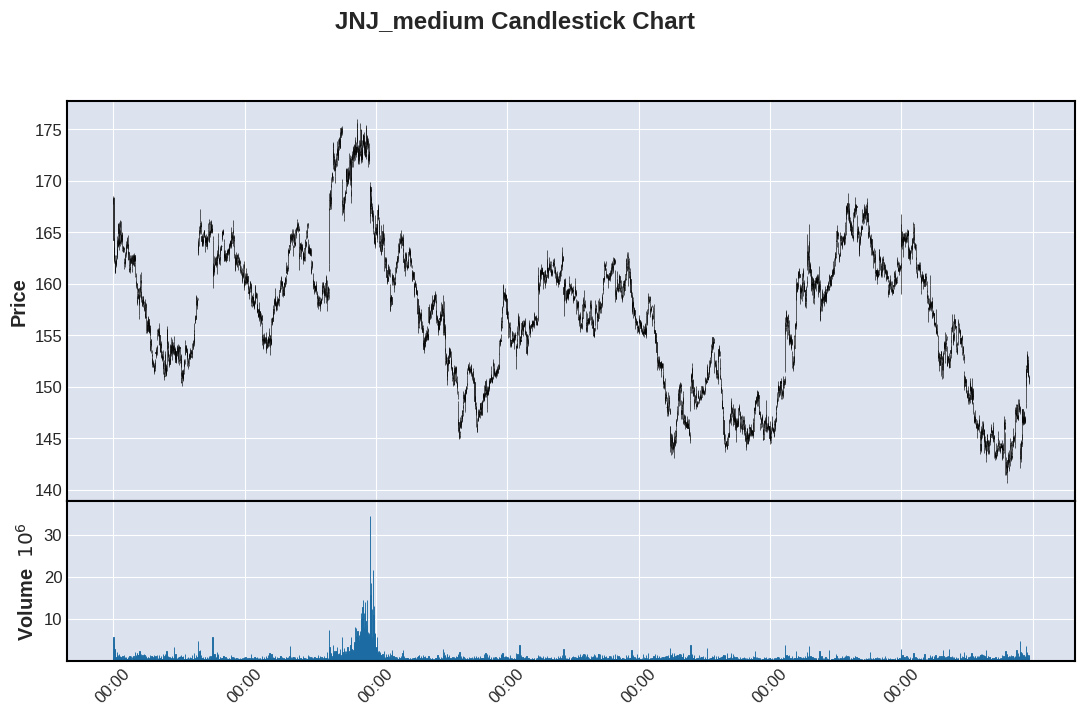

In [25]:
import mplfinance as mpf

# Ensure the index is a datetime object
jnj_medium_data.index = pd.to_datetime(jnj_medium_data.index)

# Plot candlestick chart
mpf.plot(jnj_medium_data, type='candle', volume=True, figsize=(14, 8),
         title='JNJ_medium Candlestick Chart')

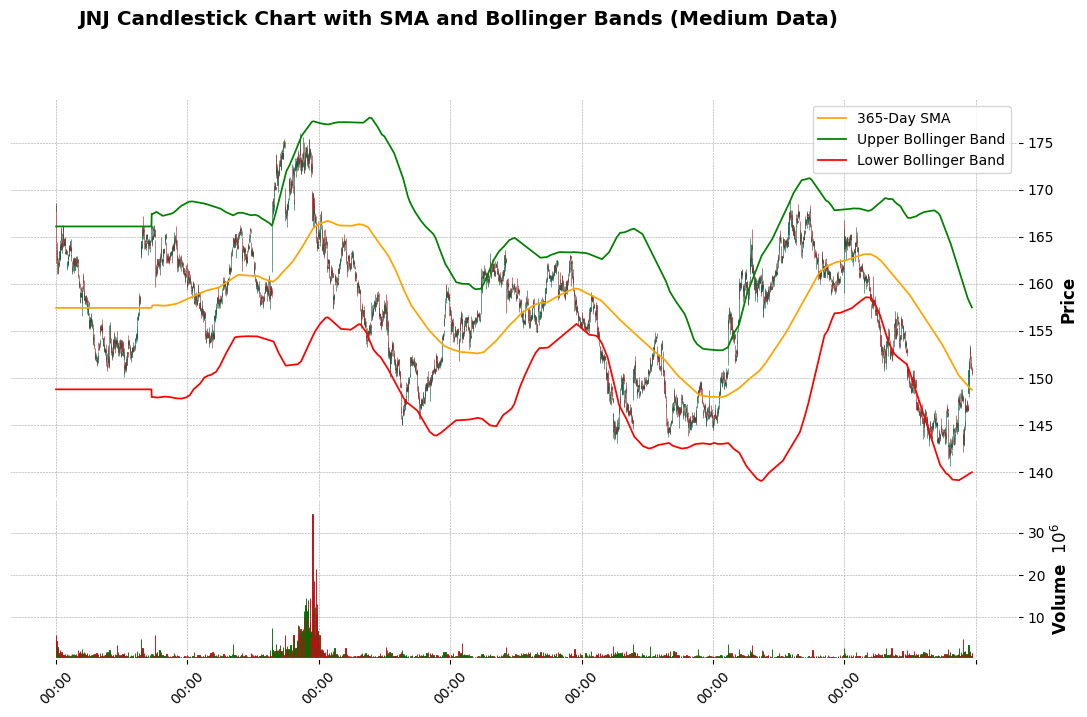

In [26]:
ap = [
    mpf.make_addplot(jnj_medium_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(jnj_medium_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(jnj_medium_data['LowerBand'], color='red', label='Lower Bollinger Band')
]

# Plot candlestick chart with SMA and Bollinger Bands
mpf.plot(
    jnj_medium_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 8),
    title='JNJ Candlestick Chart with SMA and Bollinger Bands (Medium Data)',
    style='charles'
)

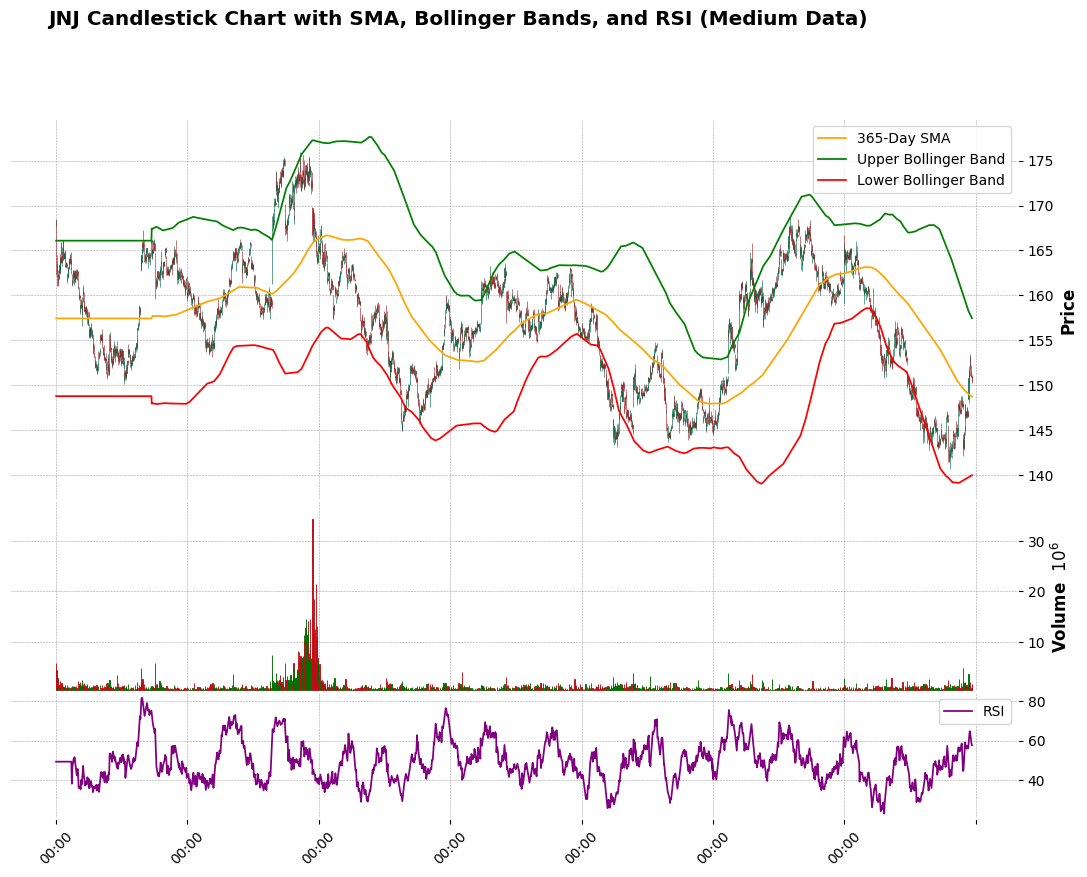

In [27]:
import mplfinance as mpf

ap = [
    mpf.make_addplot(jnj_medium_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(jnj_medium_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(jnj_medium_data['LowerBand'], color='red', label='Lower Bollinger Band'),
    mpf.make_addplot(jnj_medium_data['RSI'], panel=2, color='purple', label='RSI')  # RSI in a separate panel
]

# Plot candlestick chart with SMA, Bollinger Bands, and RSI
mpf.plot(
    jnj_medium_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 10),
    title='JNJ Candlestick Chart with SMA, Bollinger Bands, and RSI (Medium Data)',
    style='charles',
    panel_ratios=(6, 3, 2)  # Adjust panel ratios for main chart, RSI, and volume
)

## Time Series Decomposition

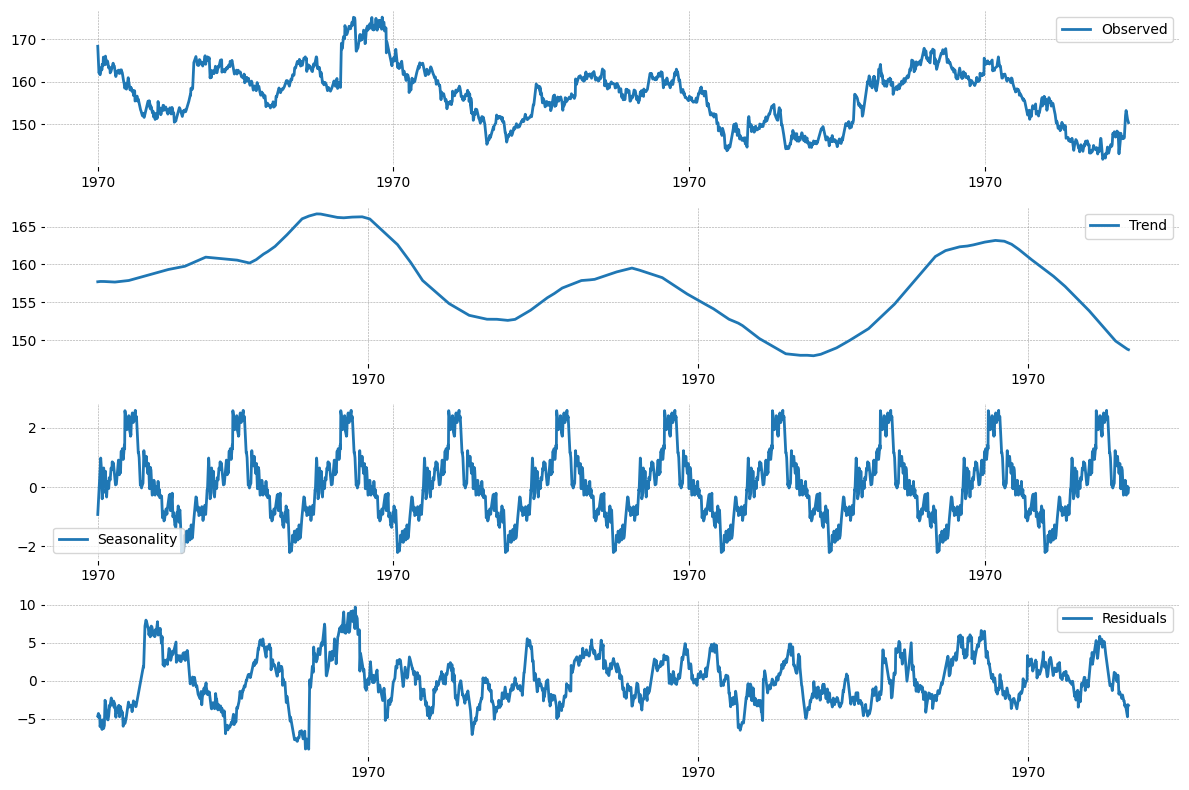

In [28]:
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(jnj_medium_data['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Daily Returns & Volatility

Historical Volatility (Standard Deviation of Daily Returns): 0.39%


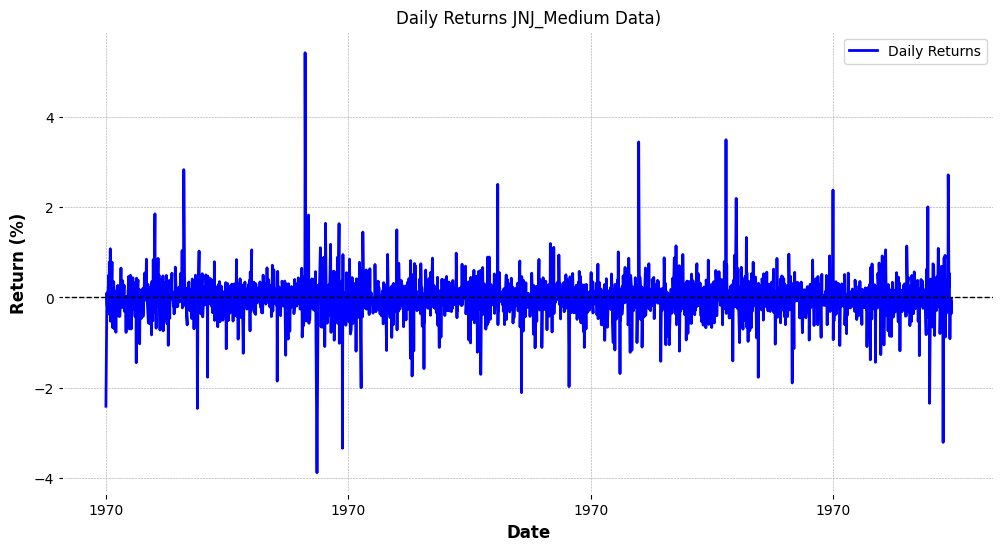

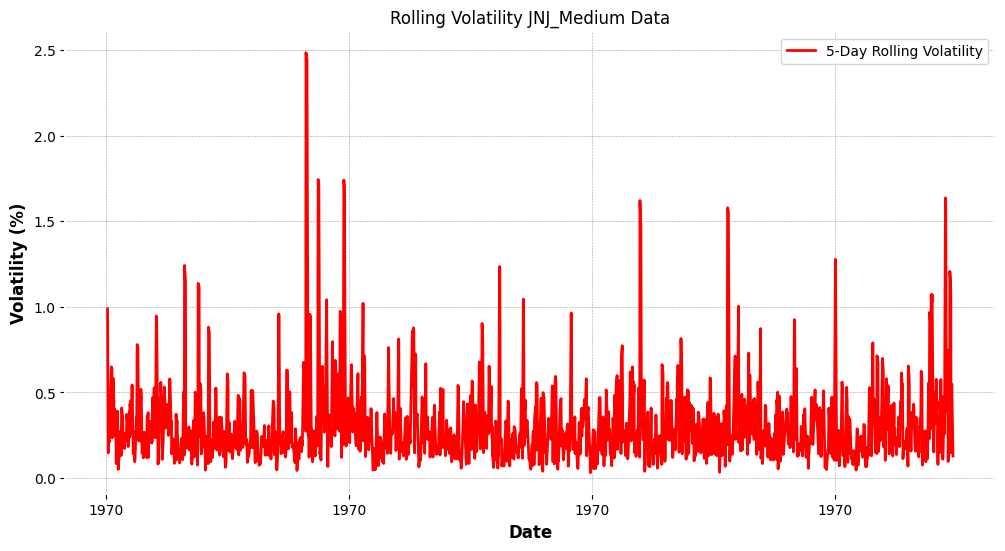

In [29]:
# Calculate daily returns
jnj_medium_data['Daily_Return'] = jnj_medium_data['Close'].pct_change() * 100  # Percentage change

# Calculate historical volatility (standard deviation of daily returns)
historical_volatility = jnj_medium_data['Daily_Return'].std()

# Print historical volatility
print(f"Historical Volatility (Standard Deviation of Daily Returns): {historical_volatility:.2f}%")

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(jnj_medium_data['Daily_Return'], label='Daily Returns', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Daily Returns JNJ_Medium Data)')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

# Calculate rolling volatility (e.g., 5-day rolling standard deviation)
rolling_window = 5  # Adjust the window size as needed
jnj_medium_data['Rolling_Volatility'] = jnj_medium_data['Daily_Return'].rolling(window=rolling_window).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(jnj_medium_data['Rolling_Volatility'], label=f'{rolling_window}-Day Rolling Volatility', color='red')
plt.title('Rolling Volatility JNJ_Medium Data')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()

# Stationarity Test

In [30]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(jnj_medium_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpret the result
if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -2.586758244111748
p-value: 0.09576506982392208
Critical Values:
   1%: -3.432227797183076
   5%: -2.8623697039362583
   10%: -2.5672116660045408
The data is non-stationary (fail to reject the null hypothesis).


In [31]:
# Apply differencing
jnj_medium_data['Close_diff'] = jnj_medium_data['Close'].diff().dropna()

In [32]:
jnj_medium_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


In [33]:
# drop na
jnj_medium_data.dropna(inplace=True)

In [34]:
jnj_medium_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


In [35]:
# Recheck stationarity using ADF test
result = adfuller(jnj_medium_data['Close_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The differenced data is stationary.")
else:
    print("The differenced data is still non-stationary.")

ADF Statistic: -60.93674422095992
p-value: 0.0
The differenced data is stationary.


<Figure size 1000x500 with 0 Axes>

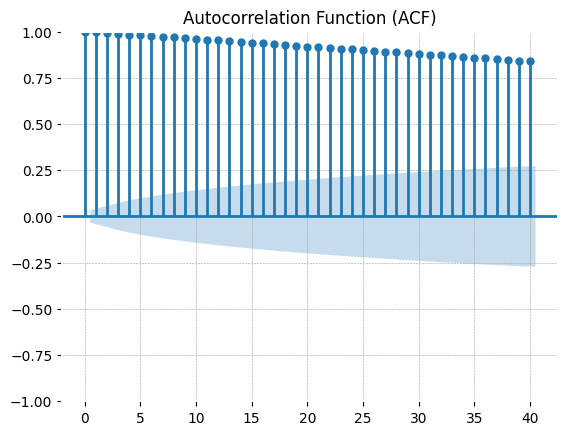

In [36]:
plt.figure(figsize=(10, 5))
plot_acf(jnj_medium_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

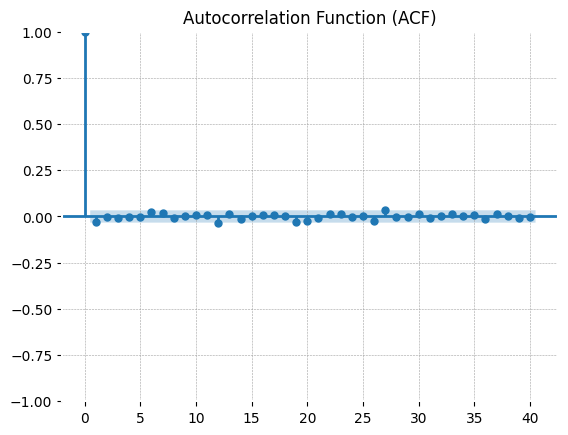

In [37]:
plt.figure(figsize=(10, 5))
plot_acf(jnj_medium_data['Close_diff'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# LSTM Model

In [ ]:
# get the Date out of the index
jnj_medium_data.reset_index(inplace=True)

In [ ]:
jnj_medium_data

,Datetime,Close,High,Low,Open,Volume,SMA,StdDev,UpperBand,LowerBand,RSI,Daily_Return,Rolling_Volatility,Close_diff
0,2023-01-30 19:30:00+00:00,162.259995,162.289993,161.080002,162.095001,2891959,157.438298,4.326015,166.090328,148.786269,49.387018,0.101788,0.988590,0.164993
1,2023-01-30 20:30:00+00:00,162.000000,162.779999,161.949997,162.276398,2301608,157.438298,4.326015,166.090328,148.786269,49.387018,-0.160233,0.313523,-0.259995
2,2023-01-31 14:30:00+00:00,161.679993,162.220001,161.050003,161.699997,2629827,157.438298,4.326015,166.090328,148.786269,49.387018,-0.197535,0.162210,-0.320007
3,2023-01-31 15:30:00+00:00,161.649994,161.750000,161.175003,161.679993,1336986,157.438298,4.326015,166.090328,148.786269,49.387018,-0.018554,0.146882,-0.029999
4,2023-01-31 16:30:00+00:00,162.169907,162.410004,161.619995,161.639999,1018924,157.438298,4.326015,166.090328,148.786269,49.387018,0.321629,0.211188,0.519913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,2025-01-28 16:30:00+00:00,151.320007,151.559998,151.070007,151.467407,720513,148.806098,4.457528,157.721154,139.891042,60.095463,-0.085830,0.430844,-0.129990
3478,2025-01-28 17:30:00+00:00,151.110001,151.440002,150.949997,151.320007,745488,148.789659,4.437841,157.665341,139.913978,59.328438,-0.138783,0.363927,-0.210007
3479,2025-01-28 18:30:00+00:00,150.990005,151.210007,150.880005,151.110001,910087,148.772481,4.417050,157.606581,139.938381,58.868570,-0.079409,0.374683,-0.119995
3480,2025-01-28 19:30:00+00:00,150.445007,151.000000,150.399994,150.979996,1479855,148.753920,4.395637,157.545193,139.962646,58.645728,-0.360950,0.130685,-0.544998


In [ ]:
# isolet the Date and Sales columns
jnj_medium_data = jnj_medium_data[['Datetime', 'Close_diff']]

In [ ]:
jnj_medium_data

,Datetime,Close_diff
0,2023-01-30 19:30:00+00:00,0.164993
1,2023-01-30 20:30:00+00:00,-0.259995
2,2023-01-31 14:30:00+00:00,-0.320007
3,2023-01-31 15:30:00+00:00,-0.029999
4,2023-01-31 16:30:00+00:00,0.519913
...,...,...
3477,2025-01-28 16:30:00+00:00,-0.129990
3478,2025-01-28 17:30:00+00:00,-0.210007
3479,2025-01-28 18:30:00+00:00,-0.119995
3480,2025-01-28 19:30:00+00:00,-0.544998


In [ ]:
# Split into training and testing sets based on index
train_size = int(len(jnj_medium_data) * 0.8)  # 80% for training
train_data = jnj_medium_data[:train_size]
test_data = jnj_medium_data[train_size:]

In [ ]:
# set the date coumn as index
train_data.set_index('Datetime', inplace=True)
test_data.set_index('Datetime', inplace=True)

In [ ]:
train_data

,Close_diff
Datetime,
2023-01-30 19:30:00+00:00,0.164993
2023-01-30 20:30:00+00:00,-0.259995
2023-01-31 14:30:00+00:00,-0.320007
2023-01-31 15:30:00+00:00,-0.029999
2023-01-31 16:30:00+00:00,0.519913
...,...
2024-08-30 17:30:00+00:00,0.339996
2024-08-30 18:30:00+00:00,0.300003
2024-08-30 19:30:00+00:00,0.790009


In [ ]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2023-01-30 19:30:00+0000', tz='UTC'),
 Timestamp('2024-09-03 14:30:00+0000', tz='UTC'))

In [ ]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2024-09-03 15:30:00+0000', tz='UTC'),
 Timestamp('2025-01-28 20:30:00+0000', tz='UTC'))

In [ ]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close_diff']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close_diff']])

In [ ]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [ ]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [ ]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - loss: 0.0739
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.0017
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0017
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0018
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0020
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
50.799609899520874


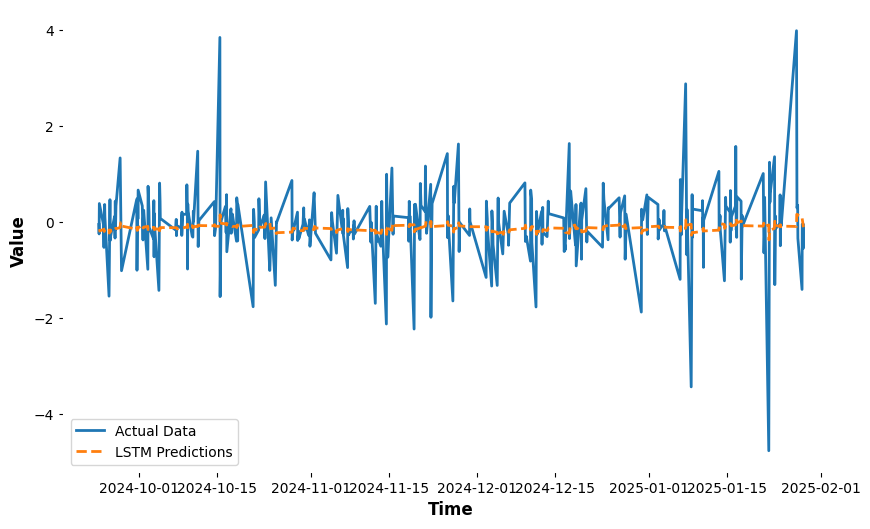

In [ ]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

-1850.2790388445685


In [ ]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━

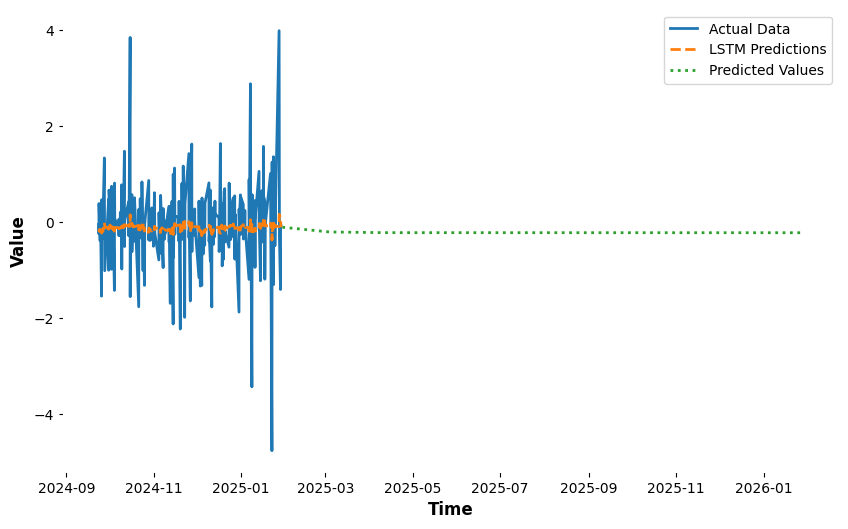

In [ ]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()